# Shading in strings

A little notebook to explore the impact of shading on the power output of systems using pvmismatch.

In [1]:
!pip install pvmismatch

In [2]:
from pvmismatch import *
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Power as a function of shading fraction of first module

Shading fully a module within a string of 10 module, leads to the output power of the string being a little bit less than 90%

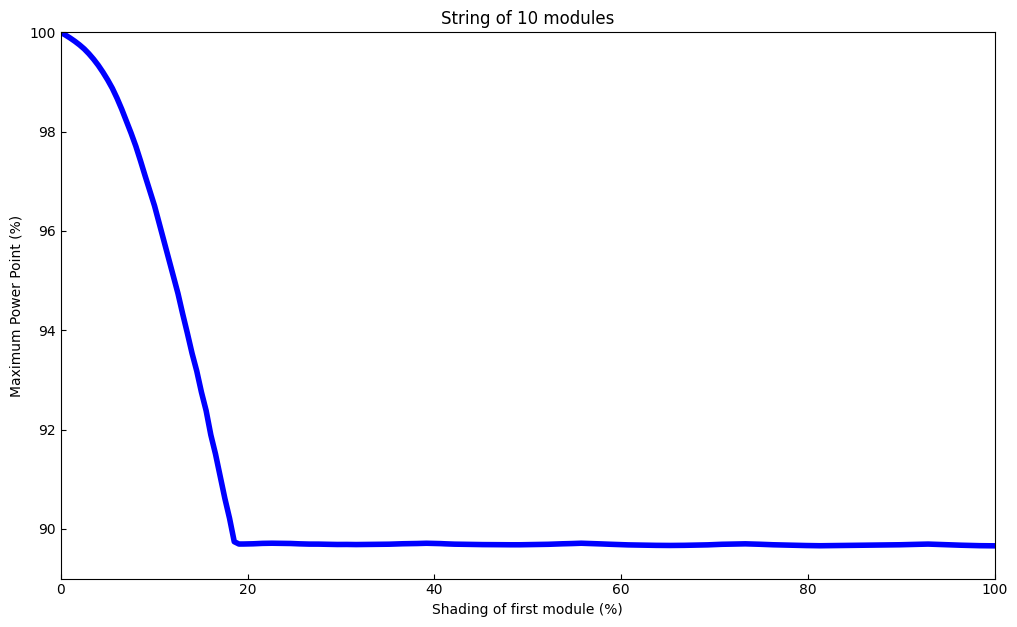

In [19]:
pvsys = pvsystem.PVsystem(numberStrs=1, numberMods=10)

shading_levels = np.linspace(0.001, 1.0, num=200)
pmp_values = []
pvsys.setSuns({0: {0: 1}})
pvsys.calcSystem()
max = pvsys.Pmp

for shading in shading_levels:
        pvsys.setSuns({0: {0: shading}})
        pvsys.calcSystem()
        pmp_values.append(pvsys.Pmp/max)

pmp_values = np.array(pmp_values)
shading_percent = np.array(1-shading_levels)*100

plt.figure(figsize=(10, 6))
plt.plot(shading_percent, pmp_values*100, color='blue', linewidth=4)
plt.tight_layout()
plt.title('String of 10 modules')
plt.xlabel('Shading of first module (%)')
plt.ylabel('Maximum Power Point (%)')
plt.tick_params(axis='both', direction='in')
plt.xlim([0, 100])
plt.ylim([89, 100])
plt.grid(False)
plt.show()

The power loss is due to the drop in voltage with less voltage building as we lose on cell string and the bypass diode activating.

# Module unshaded

The IV curve before shading looks like this:

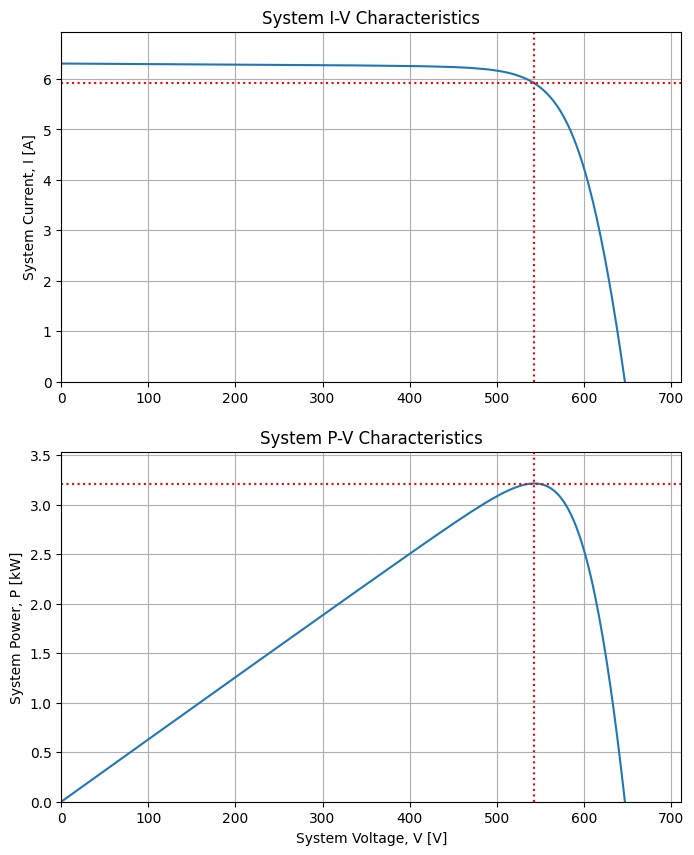

In [16]:
# System
pvsys.setSuns({0: {0: 1}})
pvsys.plotSys()
f, ax = plt.gcf(), plt.gca()
f.set_size_inches(8, 10)

# Module completely shaded

And after shading looks like this:

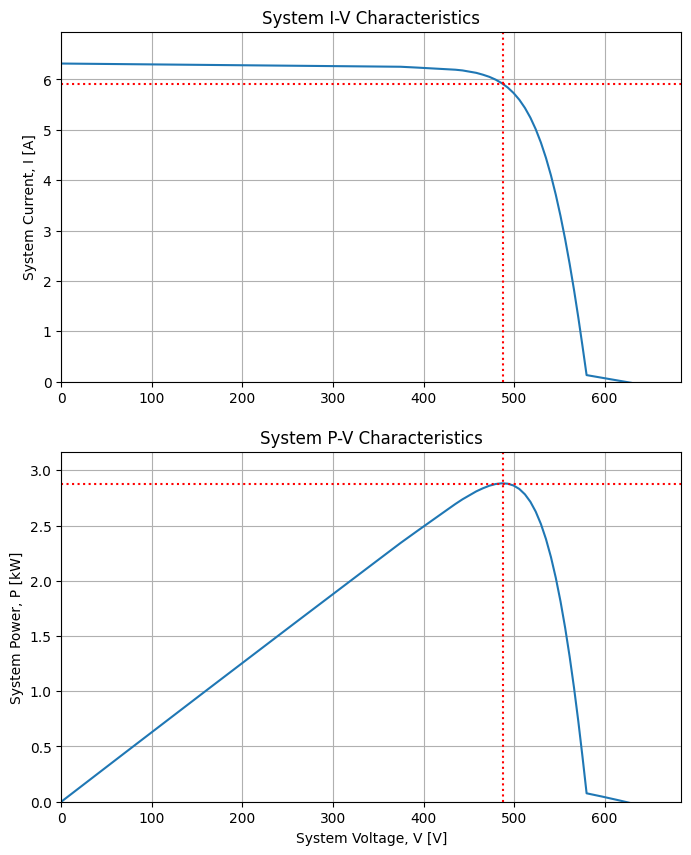

In [15]:
pvsys.setSuns({0: {0: 0.01}})
pvsys.plotSys()
f, ax = plt.gcf(), plt.gca()
f.set_size_inches(8, 10)

So the drop in power is driven only by a drop in voltage from above 500V to below 500V while the current remains unaffected.

# Half cell modules

# IV curve of shaded half cell vs full cell modules

Full cell with one cell fully shaded:

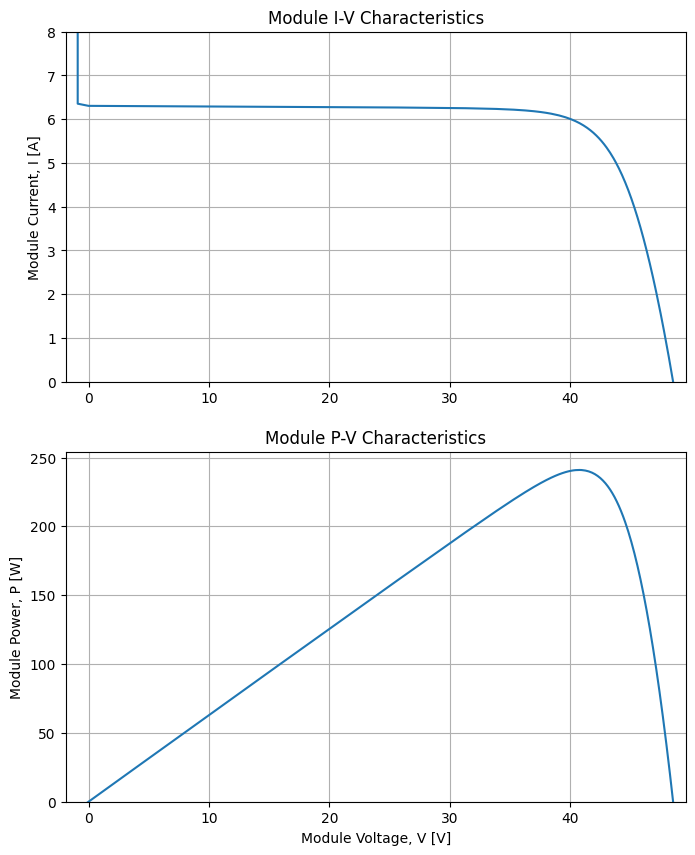

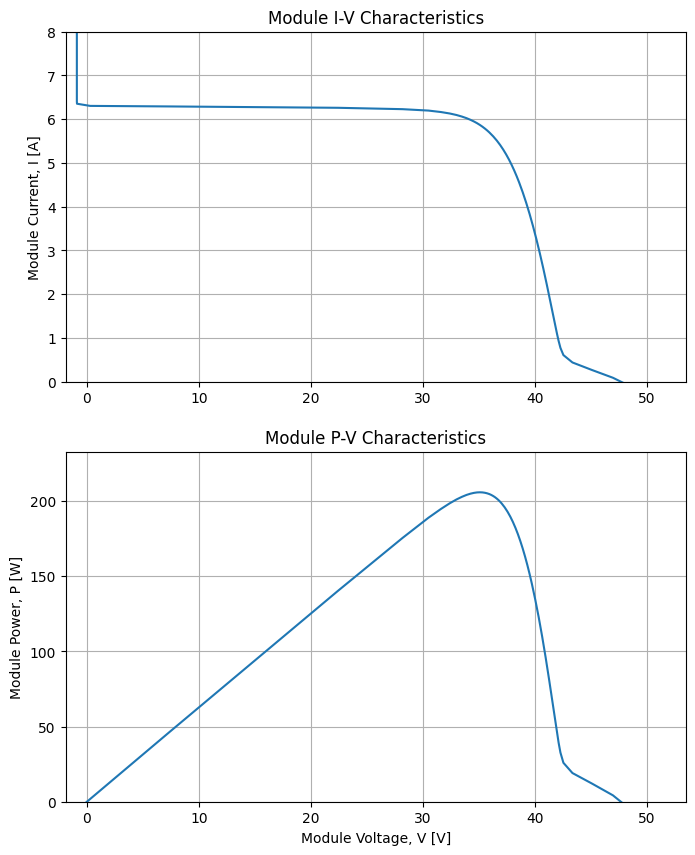

In [17]:
std72 = pvmodule.STD72
v_bypass = np.float64(-0.3)
cell_area = np.float64(252)

pv_mod = pvmodule.PVmodule(cell_pos = std72, pvcells = None, pvconst = None, Vbypass = v_bypass, cellArea = cell_area)
f = pv_mod.plotMod()
f, ax = plt.gcf(), plt.gca()
ax0 = f.axes[0]
ax0.set_ylim([0, 8])
f.set_size_inches(8, 10)

pv_mod.setSuns([0.001], cells = [0])
f = pv_mod.plotMod()
f, ax = plt.gcf(), plt.gca()
ax0 = f.axes[0]
ax0.set_ylim([0, 8])
f.set_size_inches(8, 10)

Half cell with one cell fully shaded:

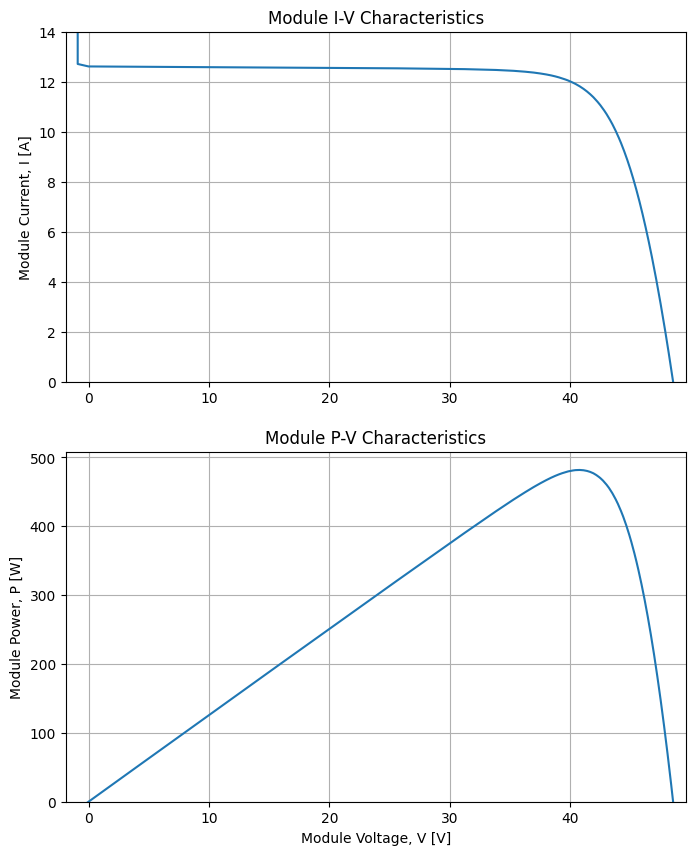

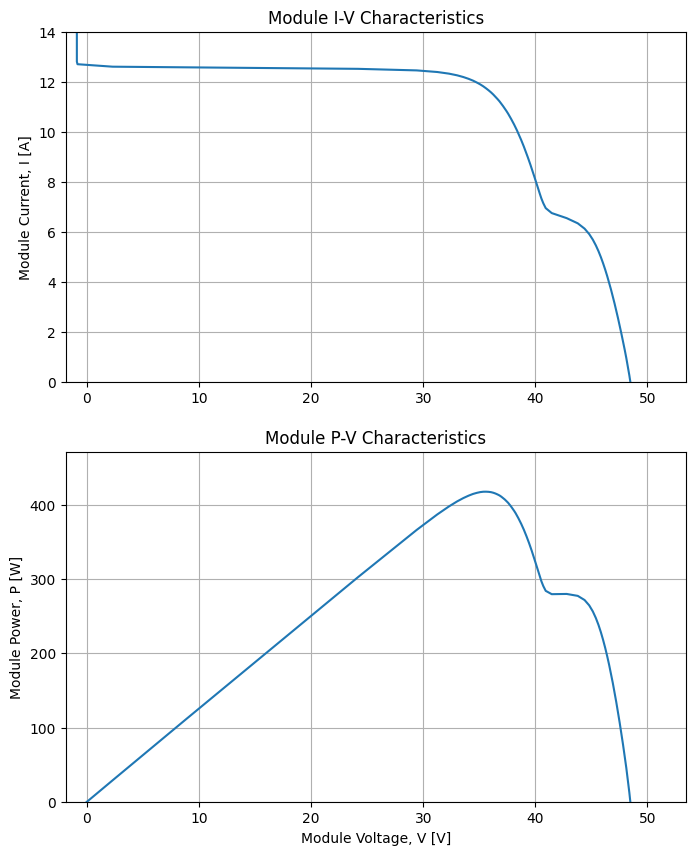

In [18]:
v_bypass = np.float64(-0.3)
cell_area = np.float64(252/2) # Half the cell area
halfcell144_bypass3 = pvmodule.crosstied_cellpos_pat([24, 24, 24], 2, partial=True)

pv_mod = pvmodule.PVmodule(cell_pos = halfcell144_bypass3, pvcells = None, pvconst = None, Vbypass = v_bypass, cellArea = cell_area)
f = pv_mod.plotMod()
f, ax = plt.gcf(), plt.gca()
ax0 = f.axes[0]
ax0.set_ylim([0, 14])
f.set_size_inches(8, 10)

pv_mod.setSuns([0.001], cells = [0])
f = pv_mod.plotMod()
f, ax = plt.gcf(), plt.gca()
ax0 = f.axes[0]
ax0.set_ylim([0, 14])
f.set_size_inches(8, 10)